# **Setup**

* https://www.youtube.com/watch?v=7MceDfpnP8k
* https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import shutil
import glob 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
Folder_Input = 'Input Data'
Folder_Train = f'{Folder_Input}/Train'
Folder_Test = f'{Folder_Input}/Test'
Folder_Val = f'{Folder_Input}/Val'

In [47]:
os.mkdir(Folder_Input)

# **Data Import**

## **Download Data**

In [3]:
os.chdir(Folder_Input)
!kaggle datasets download -d preetviradiya/brian-tumor-dataset

os.chdir('..')


  0%|          | 0.00/107M [00:00<?, ?B/s]
  1%|          | 1.00M/107M [00:00<00:57, 1.93MB/s]
  3%|▎         | 3.00M/107M [00:00<00:19, 5.55MB/s]
  5%|▍         | 5.00M/107M [00:00<00:13, 8.12MB/s]
  7%|▋         | 7.00M/107M [00:01<00:11, 9.04MB/s]
  8%|▊         | 9.00M/107M [00:01<00:09, 11.2MB/s]
 10%|█         | 11.0M/107M [00:01<00:09, 10.5MB/s]
 12%|█▏        | 13.0M/107M [00:01<00:09, 10.5MB/s]
 14%|█▍        | 15.0M/107M [00:01<00:08, 11.4MB/s]
 16%|█▌        | 17.0M/107M [00:01<00:07, 12.7MB/s]
 18%|█▊        | 19.0M/107M [00:01<00:07, 12.9MB/s]
 20%|█▉        | 21.0M/107M [00:02<00:07, 12.2MB/s]
 21%|██▏       | 23.0M/107M [00:02<00:07, 11.9MB/s]
 23%|██▎       | 25.0M/107M [00:02<00:07, 11.8MB/s]
 26%|██▌       | 28.0M/107M [00:02<00:06, 13.0MB/s]
 28%|██▊       | 30.0M/107M [00:02<00:06, 13.4MB/s]
 30%|██▉       | 32.0M/107M [00:03<00:06, 12.9MB/s]
 32%|███▏      | 34.0M/107M [00:03<00:06, 12.3MB/s]
 34%|███▎      | 36.0M/107M [00:03<00:06, 12.3MB/s]
 35%|███▌      | 38.

## **Extract Zip File**

In [6]:
def Extract_Zip(Zip_Filepath, Destination_Path):
    from zipfile import ZipFile
    with ZipFile(Zip_Filepath, 'r') as zip:
        zip.extractall(Destination_Path)

In [7]:
Extract_Zip(Zip_Filepath=f'{Folder_Input}/brian-tumor-dataset.zip',
            Destination_Path=f'{Folder_Input}')

## **Data Review**

In [8]:
Data_Folder = f'{Folder_Input}\\Brain Tumor Data Set\\Brain Tumor Data Set'
Number_of_Images = {}

for dir in os.listdir(Data_Folder):
    Number_of_Images[dir] = len(os.listdir(f'{Data_Folder}\\{dir}'))

Number_of_Images

{'Brain Tumor': 2513, 'Healthy': 2087}

In [9]:
os.listdir(Data_Folder)

['Brain Tumor', 'Healthy']

## **Train Test Split**

In [10]:
os.listdir(os.path.join(Data_Folder))

['Brain Tumor', 'Healthy']

In [11]:
# Folder_Train_Data = f'{Folder_Input}/Train Data'

# if not os.path.exists(Folder_Train_Data):
#     os.mkdir(Folder_Train_Data)
#     print(f'Created Folder {Folder_Train_Data} !','/n')

# if os.listdir(Folder_Train_Data) == []:
#     for folder in os.listdir(Data_Folder):

#         # Create Folder
#         os.mkdir(f'{Folder_Input}/Train Data/{folder}')

#         # Get List Of Files In Folder
#         Files_In_Folder = os.listdir(os.path.join(Data_Folder,folder))

#         # Select Random Files Train/Test
#         Random_Chosen_Files = np.random.choice(a= Files_In_Folder,size = int(0.7*len(Files_In_Folder)), 
#                                                replace=False)
        
#         # Copy Files to Train/Test Data Folder
#         for file in Random_Chosen_Files:
#             Source_File = os.path.join(Data_Folder,folder,file)
#             Destination_File = os.path.join(Folder_Train_Data,folder,file)
#             shutil.copy(src=Source_File,dst=Destination_File)
#         print(f'Copied {len(Random_Chosen_Files)} Files To Folder {Folder_Train_Data}/{folder}!') 
# else:
#     print(f'Folder {Folder_Train_Data} is not empty!')

In [12]:
os.listdir(Data_Folder)

['Brain Tumor', 'Healthy']

In [13]:
def Create_Data_Folder(folder_name, src_dir_path, dest_dir_path, rand_selection_prop):
    import os
    import shutil
    import numpy as np

    New_Dest_Folder_Path = f'{dest_dir_path}/{folder_name}' 

    if not os.path.exists(New_Dest_Folder_Path):
        os.mkdir(New_Dest_Folder_Path)
        print(f'Created Folder {New_Dest_Folder_Path} !')

    for folder in os.listdir(src_dir_path):

        # Create Folder
        if not os.path.exists(f'{New_Dest_Folder_Path}/{folder}'):
            os.mkdir(f'{New_Dest_Folder_Path}/{folder}')
        
        # Get List Of Files In Folder
        Files_In_Folder = os.listdir(os.path.join(src_dir_path,folder))
        No_Chosen_Files = int(rand_selection_prop*len(Files_In_Folder))

        # Select Random Files Train/Test
        Random_Chosen_Files = np.random.choice(a= Files_In_Folder,size = No_Chosen_Files,replace=False)
        
        # Copy Files to Train/Test Data Folder
        for file in Random_Chosen_Files:
            Source_File = os.path.join(src_dir_path,folder,file)
            Destination_File = os.path.join(New_Dest_Folder_Path,folder,file)
            shutil.copy(src=Source_File,dst=Destination_File)
        print(f'Copied {No_Chosen_Files} Files To Folder {New_Dest_Folder_Path}/{folder}!')
    print('\n')

In [14]:
# Create Train, Test & Validation Folder
Create_Data_Folder('Train',src_dir_path= Data_Folder ,dest_dir_path = Folder_Input,rand_selection_prop=0.7)
Create_Data_Folder('Test',src_dir_path= Data_Folder ,dest_dir_path = Folder_Input,rand_selection_prop=0.2)
Create_Data_Folder('Val',src_dir_path= Data_Folder ,dest_dir_path = Folder_Input,rand_selection_prop=0.1)

Created Folder Input Data/Train !


Copied 1759 Files To Folder Input Data/Train/Brain Tumor!
Copied 1460 Files To Folder Input Data/Train/Healthy!


Created Folder Input Data/Test !
Copied 502 Files To Folder Input Data/Test/Brain Tumor!
Copied 417 Files To Folder Input Data/Test/Healthy!


Created Folder Input Data/Val !
Copied 251 Files To Folder Input Data/Val/Brain Tumor!
Copied 208 Files To Folder Input Data/Val/Healthy!




# **Data Exploration**

## **Visualize Tumour Image**

(-0.5, 239.5, 299.5, -0.5)

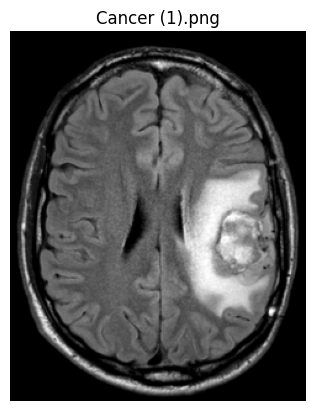

In [15]:
img = plt.imread(f'{Folder_Train}/Brain Tumor/Cancer (1).png')
plt.imshow(img,cmap='gray')
plt.title('Cancer (1).png')
plt.axis('off')

In [16]:
# # Visualize Images
# fig, axs = plt.subplots(2,4, figsize=(9,5))
# fig.suptitle('10 Random Images With Brain Tumour', fontsize=14)

# for i,img in enumerate(Tumour_Images.tolist()):
#     # print(i//4,img)
#     # for i in range(2):
#     for j in range(4):
#         img_file = plt.imread(f'{Folder_Train}/Brain Tumor/{img}')        
#         axs[i//4,j].imshow(img_file,cmap='gray')
#         axs[i//4,j].set_title(img)
#         axs[i//4,j].axis('off')

# # plt.tight_layout()
# plt.show()

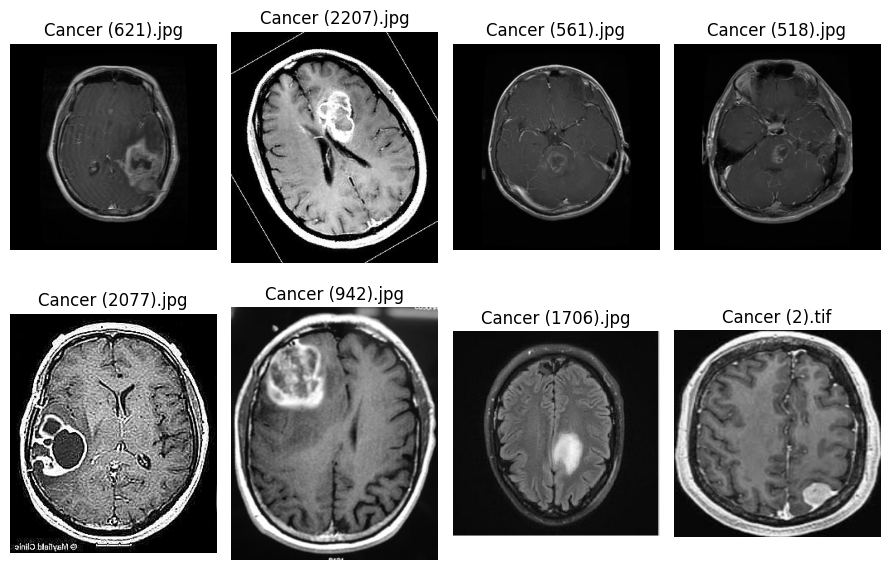

In [17]:
# Select 10 Random Images For Visualization
Tumour_Images = np.random.choice(os.listdir(f'{Folder_Train}/Brain Tumor'),8,replace=False)

# Visualize Images
plt.figure(figsize=(9,6))
# plt.title ('10 Random Images With Brain Tumour', fontsize=14)

for i,img in enumerate(Tumour_Images.tolist()):
    img_file = plt.imread(f'{Folder_Train}/Brain Tumor/{img}')       
    plt.subplot(2,4,i+1)
    plt.imshow(img_file,cmap='gray')
    plt.title(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Visualize Healthy Images**

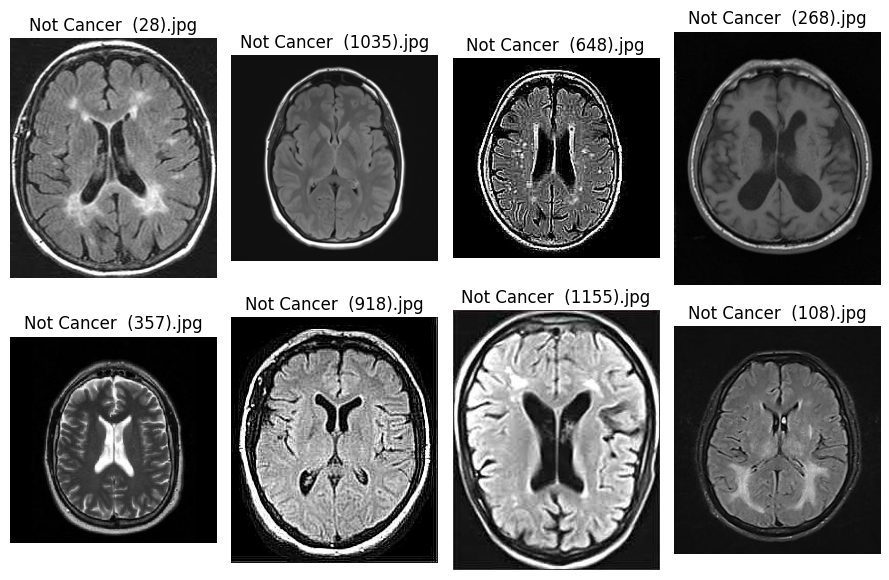

In [18]:
# Select 10 Random Images For Visualization
Healthy_Images = np.random.choice(os.listdir(f'{Folder_Train}/Healthy'),8,replace=False)

# Visualize Images
plt.figure(figsize=(9,6))
# plt.title ('10 Random Images With Brain Tumour', fontsize=14)

for i,img in enumerate(Healthy_Images.tolist()):
    img_file = plt.imread(f'{Folder_Train}/Healthy/{img}')       
    plt.subplot(2,4,i+1)
    plt.imshow(img_file,cmap='gray')
    plt.title(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Data Processing**

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocessingimages(path, size):
    image_data = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True,shear_range=0.2, rescale = 1/255)
    images = image_data.flow_from_directory(path,target_size = size, batch_size=32, class_mode='binary')
    return images

def preprocessingimages2(path, size):
    image_data = ImageDataGenerator(rescale = 1/255)
    images = image_data.flow_from_directory(path,target_size = size, batch_size=32, class_mode='binary')
    return images

In [20]:
Train_Data = preprocessingimages(path=Folder_Train,size=(224,224))
Test_Data = preprocessingimages2(path=Folder_Test,size=(224,224))
Val_Data = preprocessingimages2(path=Folder_Val,size=(224,224))

Found 3219 images belonging to 2 classes.
Found 919 images belonging to 2 classes.
Found 459 images belonging to 2 classes.


In [21]:
Train_Data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

# **Classification Model**

In [22]:
import tensorflow as tf
import keras 
from keras.layers import InputLayer, Layer,Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **Create Model**

In [23]:
Model = Sequential()
Model.add(InputLayer(input_shape = (224,224,3)))

Model.add(Conv2D(filters=16, kernel_size=(3,3), activation ='relu', padding ='same'))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(filters=32, kernel_size=(3,3), activation ='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(filters=64, kernel_size=(3,3), activation ='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(filters=128, kernel_size=(3,3), activation ='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(rate=0.25))

Model.add(Flatten())
Model.add(Dense(units=64, activation ='relu'))
# Model.add(Dropout(rate=0.25))

Model.add(Dense(1, activation ='sigmoid'))
Model.summary()

Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        

## **Fit Model**

In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

Model_ES = EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.001,mode='auto')
Model_CP = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy',save_best_only=True,
                           save_freq='epoch', verbose=1, mode='auto')
Model_CB = [Model_ES, Model_CP]

In [25]:
Model_History = Model.fit_generator(generator=Train_Data, steps_per_epoch=50, epochs=10, verbose=1,
                    validation_data = Val_Data, validation_steps=16,use_multiprocessing=True, workers=-1)
Model.save('best_model.h5')

Epoch 1/10


50/50 [==============================] - 15s 277ms/step - loss: 0.6911 - accuracy: 0.5550 - val_loss: 0.6454 - val_accuracy: 0.5969
Epoch 2/10
50/50 [==============================] - 13s 251ms/step - loss: 0.6467 - accuracy: 0.6087
Epoch 3/10
50/50 [==============================] - 17s 340ms/step - loss: 0.5207 - accuracy: 0.7486
Epoch 4/10
50/50 [==============================] - 22s 436ms/step - loss: 0.4956 - accuracy: 0.7719
Epoch 5/10
50/50 [==============================] - 22s 429ms/step - loss: 0.4523 - accuracy: 0.7875
Epoch 6/10
50/50 [==============================] - 15s 297ms/step - loss: 0.4113 - accuracy: 0.8213
Epoch 7/10
50/50 [==============================] - 18s 350ms/step - loss: 0.3913 - accuracy: 0.8255
Epoch 8/10
50/50 [==============================] - 22s 447ms/step - loss: 0.3764 - accuracy: 0.8344
Epoch 9/10
50/50 [==============================] - 20s 388ms/step - loss: 0.3376 - accuracy: 0.8488
Epoch 10/10
50/50 [============================

## **Model Visualization**

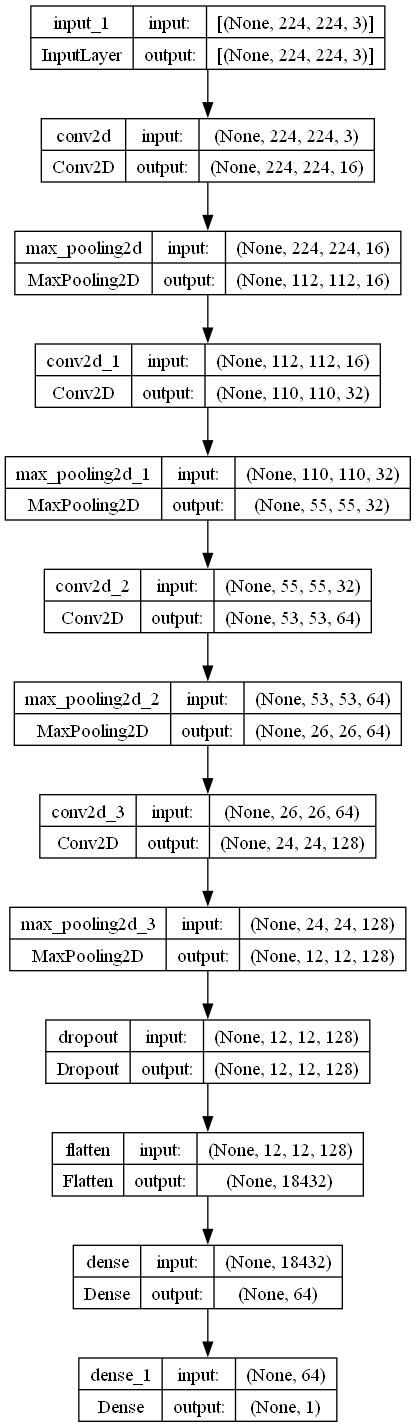

In [26]:
from IPython.display import Image

keras.utils.plot_model(Model, to_file='CNN2D_Model.png', show_shapes=True)
Image('CNN2D_Model.png')

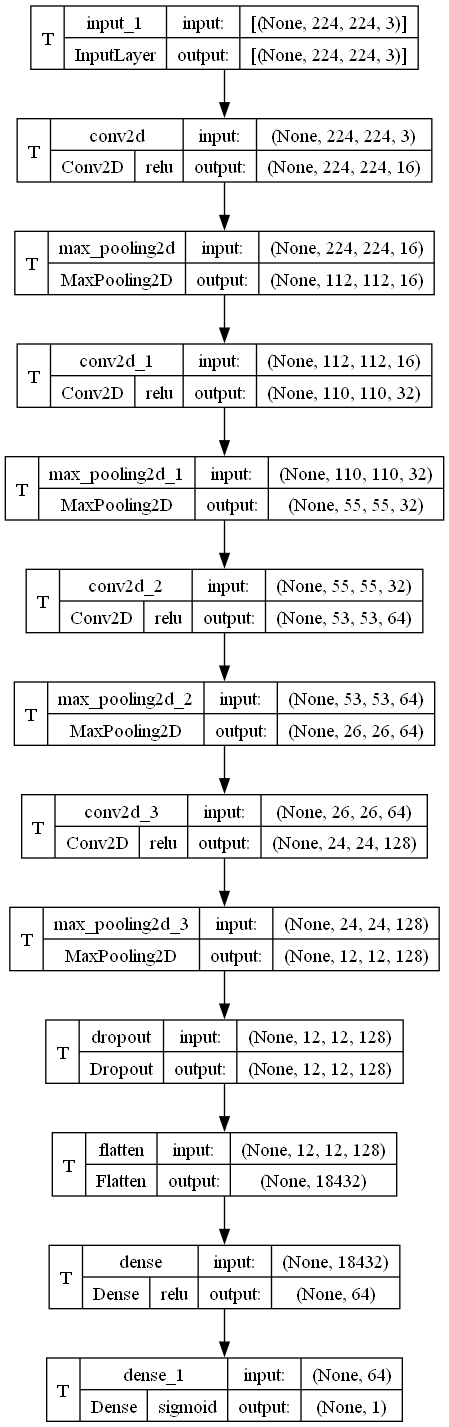

In [27]:
keras.utils.plot_model(Model, show_shapes=True,show_layer_activations=True,show_trainable=True)

## **Model Evaluation**

In [28]:
Model_History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

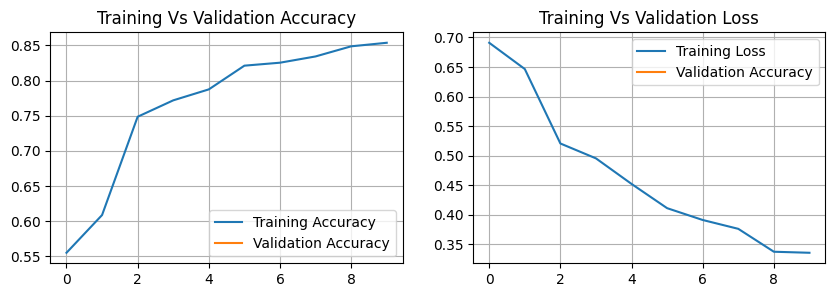

In [29]:
fig, axs = plt.subplots(1,2,figsize=(10,3))

axs[0].plot(Model_History.history['accuracy'],label='Training Accuracy')
axs[0].plot(Model_History.history['val_accuracy'],label='Validation Accuracy')
axs[0].set_title('Training Vs Validation Accuracy')
axs[0].legend()
axs[0].grid()

axs[1].plot(Model_History.history['loss'],label='Training Loss')
axs[1].plot(Model_History.history['val_loss'],label='Validation Accuracy')
axs[1].set_title('Training Vs Validation Loss')
axs[1].legend()
axs[1].grid()

plt.show()

## **Model Testing**

In [30]:
from keras.models import load_model
Model_Copy = load_model('best_model.h5')

Model_Test_Data = Model_Copy.evaluate(Test_Data)
print("Test Loss: ", Model_Test_Data[0])
print("Test Accuracy: ", Model_Test_Data[1])

29/29 [==============================] - 2s 71ms/step - loss: 0.2797 - accuracy: 0.8738
Test Loss:  0.279744952917099
Test Accuracy:  0.873775839805603


(224, 224, 3)


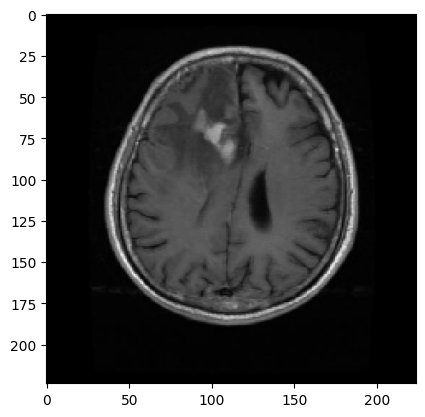

(1, 224, 224, 3)
1/1 [==============================] - 0s 130ms/step
Test Image Predicted Class:  0


In [36]:
from keras.preprocessing.image import load_img, img_to_array

# Test_Image_Path = "Input Data\\Test\\Healthy\\Not Cancer  (1).jpeg"
Test_Image_Path = 'Input Data\Test\Brain Tumor\Cancer (5).jpg'
Test_Image = load_img(Test_Image_Path, target_size=(224, 224))

Test_Image_Array = img_to_array(Test_Image)/255
print(Test_Image_Array.shape)
plt.imshow(Test_Image_Array)
plt.show()

# Reshape To Include Batch Size = 1 (Only 1 Test Image)
# Method 01
# Test_Image_Array = Test_Image_Array.reshape(1, Test_Image_Array.shape[0],Test_Image_Array.shape[1],Test_Image_Array.shape[2])
# Method 02
Test_Image_Array = np.expand_dims(Test_Image_Array, axis=0)
print(Test_Image_Array.shape)

# Model Prediction
Test_Image_Predict = Model_Copy.predict(Test_Image_Array)[0][0]
Test_Image_Predict = int(round(Test_Image_Predict,0))
print('Test Image Predicted Class: ',Test_Image_Predict)

In [37]:
Train_Data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

# **Transfer Learning Model**

In [38]:
from keras.applications.mobilenet import MobileNet, preprocess_input

## **Preprocessing**

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def TLpreprocessingimages(path, size):
    image_data = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    zoom_range=0.2, horizontal_flip=True,shear_range=0.2)
    images = image_data.flow_from_directory(path,target_size = size, batch_size=32, class_mode='binary')
    return images

def TLpreprocessingimages2(path, size):
    image_data = ImageDataGenerator(preprocessing_function = preprocess_input)
    images = image_data.flow_from_directory(path,target_size = size, batch_size=32, class_mode='binary')
    return images

In [40]:
TL_Train_Data = TLpreprocessingimages(path=Folder_Train,size=(224,224))
TL_Test_Data = TLpreprocessingimages2(path=Folder_Test,size=(224,224))
TL_Val_Data = TLpreprocessingimages2(path=Folder_Val,size=(224,224))

Found 3219 images belonging to 2 classes.
Found 919 images belonging to 2 classes.
Found 459 images belonging to 2 classes.


## **Download & Load Model**

In [41]:
Model02 = MobileNet(input_shape=(224,224,3), include_top=False)

# Disable training for all layers
for layer in Model02.layers:
    layer.trainable = False

# Add new layers
X = Flatten()(Model02.output)
X = Dense(1, activation='sigmoid')(X)

from keras.models import Model
Model02 = Model(Model02.input,X)
Model02.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

## **Model Compilation**

In [42]:
Model02.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ModelCheckpoint

Model02_ES = EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.001,mode='auto')
Model02_CP = ModelCheckpoint(filepath='TL_best_model.h5', monitor='val_accuracy',save_best_only=True,
                           save_freq='epoch', verbose=1, mode='auto')
Model02_CB = [Model02_ES, Model02_CP]

## **Model Training**

In [43]:
Model02_History = Model02.fit_generator(TL_Train_Data, steps_per_epoch=8, epochs=5,verbose=1, callbacks=Model02_CB,
                      validation_data=TL_Test_Data, validation_steps=16)

Epoch 1/5
8/8 [==============================] - ETA: 0s - loss: 5.3870 - accuracy: 0.6667
Epoch 1: val_accuracy improved from -inf to 0.65625, saving model to TL_best_model.h5
8/8 [==============================] - 7s 726ms/step - loss: 5.3870 - accuracy: 0.6667 - val_loss: 3.7524 - val_accuracy: 0.6562
Epoch 2/5
8/8 [==============================] - ETA: 0s - loss: 2.5211 - accuracy: 0.7656
Epoch 2: val_accuracy improved from 0.65625 to 0.89453, saving model to TL_best_model.h5
8/8 [==============================] - 5s 673ms/step - loss: 2.5211 - accuracy: 0.7656 - val_loss: 0.7803 - val_accuracy: 0.8945
Epoch 3/5
8/8 [==============================] - ETA: 0s - loss: 0.6536 - accuracy: 0.8906
Epoch 3: val_accuracy improved from 0.89453 to 0.91211, saving model to TL_best_model.h5
8/8 [==============================] - 5s 675ms/step - loss: 0.6536 - accuracy: 0.8906 - val_loss: 0.6172 - val_accuracy: 0.9121
Epoch 4/5
8/8 [==============================] - ETA: 0s - loss: 1.6435 - ac

## **Model Evaluation**

In [44]:
Model02_History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

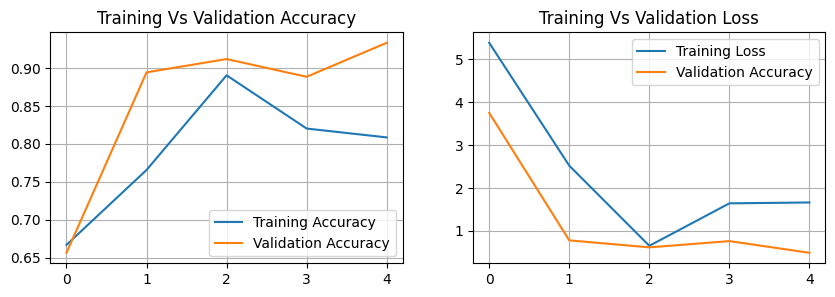

In [45]:
fig, axs = plt.subplots(1,2,figsize=(10,3))

axs[0].plot(Model02_History.history['accuracy'],label='Training Accuracy')
axs[0].plot(Model02_History.history['val_accuracy'],label='Validation Accuracy')
axs[0].set_title('Training Vs Validation Accuracy')
axs[0].legend()
axs[0].grid()

axs[1].plot(Model02_History.history['loss'],label='Training Loss')
axs[1].plot(Model02_History.history['val_loss'],label='Validation Accuracy')
axs[1].set_title('Training Vs Validation Loss')
axs[1].legend()
axs[1].grid()

plt.show()